In [1]:
# Install yfinance if not installed:
# !pip install yfinance

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [3]:
ticker = 'AAPL'
start_date = '2010-01-01'
end_date = '2024-05-01'

data = yf.download(ticker, start=start_date, end=end_date)
print(data.head())


YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open     Volume
Ticker          AAPL      AAPL      AAPL      AAPL       AAPL
Date                                                         
2010-01-04  6.431896  6.446623  6.382908  6.414465  493729600
2010-01-05  6.443017  6.479383  6.409056  6.449630  601904800
2010-01-06  6.340531  6.468562  6.333919  6.443016  552160000
2010-01-07  6.328812  6.371490  6.282829  6.363976  477131200
2010-01-08  6.370888  6.371489  6.283130  6.320397  447610800


In [5]:
close_prices = data['Close'].values.reshape(-1,1)

scaler = MinMaxScaler(feature_range=(0,1))
scaled_close = scaler.fit_transform(close_prices)


In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

early_stop = EarlyStopping(monitor='loss', patience=5)

model.summary()


C:\Users\ACER\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
history = model.fit(X, y, epochs=20, batch_size=32, callbacks=[early_stop])


Epoch 1/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 12s 53ms/step - loss: 0.0267
Epoch 2/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 0.0017
Epoch 3/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0015
Epoch 4/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - loss: 0.0012
Epoch 5/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0012
Epoch 6/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0011
Epoch 7/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0011
Epoch 8/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - loss: 9.8509e-04
Epoch 9/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0010
Epoch 10/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 9.0485e-04
Epoch 11/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 9.0384e-04
Epoch 12/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 8.6385e-04
Epoch 13/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 7.9645e-04
Epoch 14/20
111/111 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0010
Epoch 15/20
111/111 ━━

In [17]:
last_60_days = scaled_close[-seq_length:]
X_test = last_60_days.reshape(1, seq_length, 1)

predicted_price_scaled = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price_scaled)

print(f"Predicted next day closing price: ${predicted_price[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Predicted next day closing price: $165.63


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━

TypeError: DatetimeArray._generate_range() got an unexpected keyword argument 'closed'

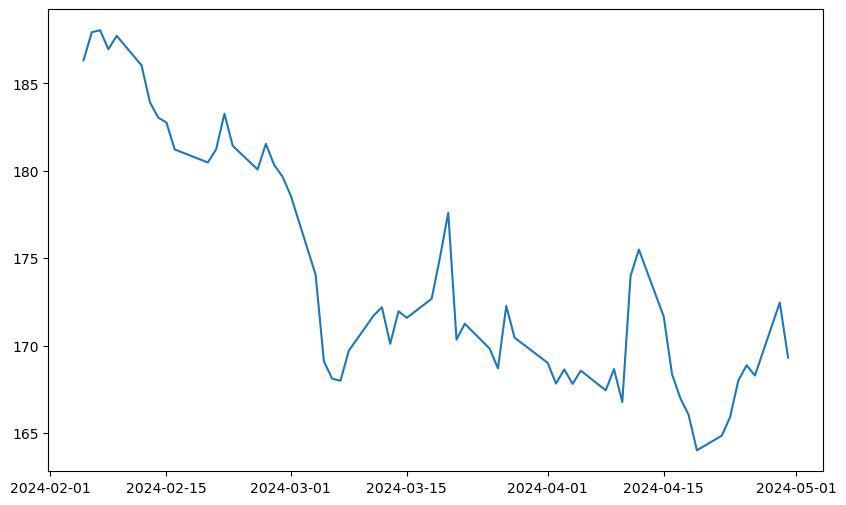

In [19]:
predicted_prices = []
current_seq = last_60_days

for _ in range(30):
    X_input = current_seq.reshape(1, seq_length, 1)
    pred = model.predict(X_input)[0][0]
    predicted_prices.append(pred)
    current_seq = np.append(current_seq[1:], pred).reshape(seq_length, 1)

predicted_prices = scaler.inverse_transform(np.array(predicted_prices).reshape(-1,1))

# Plotting
plt.figure(figsize=(10,6))
plt.plot(data.index[-60:], data['Close'][-60:], label='Last 60 Days Close Price')
future_dates = pd.date_range(start=data.index[-1], periods=30+1, closed='right')
plt.plot(future_dates, predicted_prices, label='Predicted Next 30 Days')
plt.title(f'{ticker} Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
